# #############################


# VS2 same as VS1, aspire to select higher row sample

# SECTION: Library Installations and GPU checks

In [13]:
import tensorflow as tf

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

# Check if GPU (Metal) is available
print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))

TensorFlow version: 2.16.2
Num GPUs Available: 1


In [14]:
import tensorflow as tf
import time

# Create a large random tensor
tensor_a = tf.random.normal([1000, 1000])
tensor_b = tf.random.normal([1000, 1000])

# Perform matrix multiplication on GPU
start_time = time.time()
result = tf.matmul(tensor_a, tensor_b)
end_time = time.time()

print("Time taken for matrix multiplication:", end_time - start_time, "seconds")

Time taken for matrix multiplication: 0.0011372566223144531 seconds


# SECTION: Imports and more Libary Installs

In [15]:
#! brew install cmake

In [16]:
#! pip install tensorflow-datasets

In [17]:
# ! pip install scikit-learn

In [18]:
# ! pip install shap


In [19]:
# ! pip install keras-tuner

In [20]:
# standard
import pandas as pd
import numpy as np
import random
import os

# tf and keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow_datasets as tfds


import keras
import keras_tuner as kt

from keras import layers, models
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor

# shap
#import shap

# plots and images
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

# others
import re
from sklearn.decomposition import PCA
#from wordcloud import WordCloud
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

#silence TF
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 


random.seed(42)
%matplotlib inline

# FILL IN CODE HERE #
RANDOM_SAMPLES_VAL = 500000 #To make computing on local machine, colab palatable, we will use a random sample for the exercise  

# SECTION: Our helper and utility functions

In [21]:
#VS - II helpful functions

# summarizes a data frame in a printer friendly way
def summarize_dataframe(df):
    summary = pd.DataFrame({
        'Column Name': df.columns,
        'Data Type': df.dtypes.values,
        'Null Count': df.isnull().sum().values,
        'Non-Null Count': df.notnull().sum().values,
        'Unique Count': df.nunique().values
    })
    return summary

# SECTION: Data Load

In [22]:
#Retail Data.csv is our master data file from Kaggle
retail_df=pd.read_csv('retail_data.csv')

In [23]:
retail_df

,customer_id,age,gender,income_bracket,loyalty_program,membership_years,churned,marital_status,number_of_children,education_level,...,distance_to_store,holiday_season,season,weekend,customer_support_calls,email_subscriptions,app_usage,website_visits,social_media_engagement,days_since_last_purchase
0,1,56,Other,High,No,0,No,Divorced,3,Bachelor's,...,33.21,No,Spring,Yes,5,No,High,30,High,40
1,2,69,Female,Medium,No,2,No,Married,2,PhD,...,62.56,No,Summer,Yes,6,No,High,40,Medium,338
2,3,46,Female,Low,No,5,No,Married,3,Bachelor's,...,83.04,Yes,Winter,Yes,2,Yes,Low,89,Medium,61
3,4,32,Female,Low,No,0,No,Divorced,2,Master's,...,50.43,Yes,Winter,No,12,No,Low,12,Low,42
4,5,60,Female,Low,Yes,7,Yes,Divorced,2,Bachelor's,...,36.55,Yes,Summer,Yes,3,No,Medium,31,Low,242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999996,39,Female,Low,No,1,Yes,Married,4,High School,...,10.55,Yes,Spring,No,5,Yes,Low,75,High,163
999996,999997,77,Female,Low,No,4,Yes,Single,2,Master's,...,8.08,Yes,Winter,No,5,No,Low,60,Low,12
999997,999998,67,Male,Medium,No,7,Yes,Single,3,Bachelor's,...,87.26,Yes,Summer,Yes,17,No,High,14,Medium,118
999998,999999,36,Male,Low,Yes,1,Yes,Divorced,2,High School,...,94.17,Yes,Winter,No,13,Yes,Medium,87,High,240


In [24]:
retail_df.shape

(1000000, 78)

In [25]:
summarize_dataframe(retail_df)

,Column Name,Data Type,Null Count,Non-Null Count,Unique Count
0,customer_id,int64,0,1000000,1000000
1,age,int64,0,1000000,62
2,gender,object,0,1000000,3
3,income_bracket,object,0,1000000,3
4,loyalty_program,object,0,1000000,2
...,...,...,...,...,...
73,email_subscriptions,object,0,1000000,2
74,app_usage,object,0,1000000,3
75,website_visits,int64,0,1000000,100
76,social_media_engagement,object,0,1000000,3


In [26]:
retail_df.columns

Index(['customer_id', 'age', 'gender', 'income_bracket', 'loyalty_program',
       'membership_years', 'churned', 'marital_status', 'number_of_children',
       'education_level', 'occupation', 'transaction_id', 'transaction_date',
       'product_id', 'product_category', 'quantity', 'unit_price',
       'discount_applied', 'payment_method', 'store_location',
       'transaction_hour', 'day_of_week', 'week_of_year', 'month_of_year',
       'avg_purchase_value', 'purchase_frequency', 'last_purchase_date',
       'avg_discount_used', 'preferred_store', 'online_purchases',
       'in_store_purchases', 'avg_items_per_transaction',
       'avg_transaction_value', 'total_returned_items', 'total_returned_value',
       'total_sales', 'total_transactions', 'total_items_purchased',
       'total_discounts_received', 'avg_spent_per_category',
       'max_single_purchase_value', 'min_single_purchase_value',
       'product_name', 'product_brand', 'product_rating',
       'product_review_count', '

In [27]:
retail_df

,customer_id,age,gender,income_bracket,loyalty_program,membership_years,churned,marital_status,number_of_children,education_level,...,distance_to_store,holiday_season,season,weekend,customer_support_calls,email_subscriptions,app_usage,website_visits,social_media_engagement,days_since_last_purchase
0,1,56,Other,High,No,0,No,Divorced,3,Bachelor's,...,33.21,No,Spring,Yes,5,No,High,30,High,40
1,2,69,Female,Medium,No,2,No,Married,2,PhD,...,62.56,No,Summer,Yes,6,No,High,40,Medium,338
2,3,46,Female,Low,No,5,No,Married,3,Bachelor's,...,83.04,Yes,Winter,Yes,2,Yes,Low,89,Medium,61
3,4,32,Female,Low,No,0,No,Divorced,2,Master's,...,50.43,Yes,Winter,No,12,No,Low,12,Low,42
4,5,60,Female,Low,Yes,7,Yes,Divorced,2,Bachelor's,...,36.55,Yes,Summer,Yes,3,No,Medium,31,Low,242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999996,39,Female,Low,No,1,Yes,Married,4,High School,...,10.55,Yes,Spring,No,5,Yes,Low,75,High,163
999996,999997,77,Female,Low,No,4,Yes,Single,2,Master's,...,8.08,Yes,Winter,No,5,No,Low,60,Low,12
999997,999998,67,Male,Medium,No,7,Yes,Single,3,Bachelor's,...,87.26,Yes,Summer,Yes,17,No,High,14,Medium,118
999998,999999,36,Male,Low,Yes,1,Yes,Divorced,2,High School,...,94.17,Yes,Winter,No,13,Yes,Medium,87,High,240


In [28]:
retail_df

retail_df.shape

(1000000, 78)

In [29]:
retail_df.iloc[:5]

,customer_id,age,gender,income_bracket,loyalty_program,membership_years,churned,marital_status,number_of_children,education_level,...,distance_to_store,holiday_season,season,weekend,customer_support_calls,email_subscriptions,app_usage,website_visits,social_media_engagement,days_since_last_purchase
0,1,56,Other,High,No,0,No,Divorced,3,Bachelor's,...,33.21,No,Spring,Yes,5,No,High,30,High,40
1,2,69,Female,Medium,No,2,No,Married,2,PhD,...,62.56,No,Summer,Yes,6,No,High,40,Medium,338
2,3,46,Female,Low,No,5,No,Married,3,Bachelor's,...,83.04,Yes,Winter,Yes,2,Yes,Low,89,Medium,61
3,4,32,Female,Low,No,0,No,Divorced,2,Master's,...,50.43,Yes,Winter,No,12,No,Low,12,Low,42
4,5,60,Female,Low,Yes,7,Yes,Divorced,2,Bachelor's,...,36.55,Yes,Summer,Yes,3,No,Medium,31,Low,242


In [30]:
retail_df.columns

Index(['customer_id', 'age', 'gender', 'income_bracket', 'loyalty_program',
       'membership_years', 'churned', 'marital_status', 'number_of_children',
       'education_level', 'occupation', 'transaction_id', 'transaction_date',
       'product_id', 'product_category', 'quantity', 'unit_price',
       'discount_applied', 'payment_method', 'store_location',
       'transaction_hour', 'day_of_week', 'week_of_year', 'month_of_year',
       'avg_purchase_value', 'purchase_frequency', 'last_purchase_date',
       'avg_discount_used', 'preferred_store', 'online_purchases',
       'in_store_purchases', 'avg_items_per_transaction',
       'avg_transaction_value', 'total_returned_items', 'total_returned_value',
       'total_sales', 'total_transactions', 'total_items_purchased',
       'total_discounts_received', 'avg_spent_per_category',
       'max_single_purchase_value', 'min_single_purchase_value',
       'product_name', 'product_brand', 'product_rating',
       'product_review_count', '

# Initial EDA Comments: Initial Observations of our data set

    - Shape: 1000000 x 78. 1 M rows, 78 columns
    - No columns have nulls / missing values.
    - Names of all columns are lower case, with no spaces, and use underscore. Names of all columns seem nicely formatted.


# Extract features for Lifetime value modeling

In [31]:
## Select a random sample of RANDOM_SAMPLES_VAL (e.g. 100K) rows to make the ML model run on limited compute resources
retail_df = retail_df.sample(n=RANDOM_SAMPLES_VAL, random_state=42)

In [32]:
desired_columns = ['customer_id','avg_purchase_value','purchase_frequency','membership_years','last_purchase_date','avg_discount_used',
'preferred_store','avg_items_per_transaction','avg_transaction_value','total_returned_items',
'total_returned_value','total_sales','total_transactions','total_items_purchased',
'total_discounts_received','avg_spent_per_category','holiday_season',
'customer_support_calls','app_usage','website_visits','social_media_engagement',
'days_since_last_purchase']
lftv_data = retail_df[desired_columns]
lftv_data.shape

(500000, 22)

In [33]:
summarize_dataframe(lftv_data)

,Column Name,Data Type,Null Count,Non-Null Count,Unique Count
0,customer_id,int64,0,500000,500000
1,avg_purchase_value,float64,0,500000,48999
2,purchase_frequency,object,0,500000,4
3,membership_years,int64,0,500000,10
4,last_purchase_date,object,0,500000,495981
5,avg_discount_used,float64,0,500000,51
6,preferred_store,object,0,500000,4
7,avg_items_per_transaction,float64,0,500000,901
8,avg_transaction_value,float64,0,500000,48998
9,total_returned_items,int64,0,500000,10


In [34]:
selected_cols = ['customer_id',]

In [35]:
##Business logic calucation functions

def calculate_CL(membership_years):
    ## Caculates Customer lifespan in years
    # from (loyalty) membership years.

    #cl = customer lifespan in years (can be fraction)
    cl = 0.0
    #1 calcuate CLV1 from membership years
    if (membership_years >= 7.0 ):
        cl  = 0.6 * membership_years
    elif (membership_years >= 4) & (membership_years < 7.0):
        cl = 0.8 * membership_years
    elif (membership_years > 0) & (membership_years < 4.0):
        cl = 1 * membership_years
    else:
        cl = 0.5 # for loyalty membership =0 years 
    return cl

def map_purchase_freq_to_nums(purchase_frequency):
    ##takes in daily, weekly, yearly labels for purchase frequency
    # and converts it to a number using a rules formula
    frequency_map = {
        'Daily': 365,
        'Weekly': 52,
        'Monthly': 12,
        'Yearly': 1
    }
    return frequency_map.get(purchase_frequency)


def calculate_CLV(average_purchase_value, purchase_frequency,customer_lifespan,total_sales, add_noise_std_dev=0.1):
    ## calculates the (ground truth) customer lifetime value from
    #average pruchase value, purchase frequency, and total sales

    clv1 = float(average_purchase_value) * float(purchase_frequency) * float(customer_lifespan)
    clv2 = total_sales * customer_lifespan
    clv = (clv1 + clv2) / 2.0

    #Now we will add some noise to the growth truth clv calculation
    # Add Gaussian noise (normal distribution centered at 0, with standard deviation add_noise_std_dev * base calcuated clv)
    noise = np.random.normal(0, add_noise_std_dev * clv)
    clv = clv + noise

    return clv

In [36]:
#extract customer lifespan
lftv_data['customer_lifespan'] = lftv_data['membership_years'].apply(calculate_CL)

In [37]:
#convert purchase frequency to integer values
lftv_data['purchase_frequency'] = lftv_data['purchase_frequency'].apply(map_purchase_freq_to_nums)

In [38]:
lftv_data['customer_lifetime_value'] = lftv_data.apply(lambda row: calculate_CLV(row['avg_purchase_value'],
                                                                                 row['purchase_frequency'],
                                                                                 row['customer_lifespan'],
                                                                                 row['total_sales']), axis=1)

In [39]:
lftv_data.iloc[:5]

,customer_id,avg_purchase_value,purchase_frequency,membership_years,last_purchase_date,avg_discount_used,preferred_store,avg_items_per_transaction,avg_transaction_value,total_returned_items,...,total_discounts_received,avg_spent_per_category,holiday_season,customer_support_calls,app_usage,website_visits,social_media_engagement,days_since_last_purchase,customer_lifespan,customer_lifetime_value
987231,987232,460.29,52,8,2021-03-22 06:11:14,0.49,Location D,1.70,374.84,5,...,263.01,99.19,Yes,1,Low,75,High,329,4.8,64871.900325
79954,79955,471.25,12,1,2021-05-25 01:33:35,0.36,Location B,5.96,127.35,0,...,104.15,141.69,No,3,Medium,77,High,145,1.0,4706.337426
567130,567131,200.59,52,0,2021-04-08 07:24:34,0.24,Location C,3.22,190.46,8,...,428.12,162.92,Yes,14,Medium,52,Low,95,0.5,3900.144147
500891,500892,416.72,52,3,2021-05-01 08:25:43,0.43,Location A,3.24,304.81,5,...,245.91,241.16,No,7,Low,21,Low,124,3.0,44182.619203
55399,55400,180.79,365,3,2021-10-17 16:57:36,0.48,Location C,9.76,136.49,6,...,464.84,165.24,Yes,17,Low,69,Low,240,3.0,101449.206521


In [40]:
summarize_dataframe(lftv_data)

,Column Name,Data Type,Null Count,Non-Null Count,Unique Count
0,customer_id,int64,0,500000,500000
1,avg_purchase_value,float64,0,500000,48999
2,purchase_frequency,int64,0,500000,4
3,membership_years,int64,0,500000,10
4,last_purchase_date,object,0,500000,495981
5,avg_discount_used,float64,0,500000,51
6,preferred_store,object,0,500000,4
7,avg_items_per_transaction,float64,0,500000,901
8,avg_transaction_value,float64,0,500000,48998
9,total_returned_items,int64,0,500000,10


In [41]:
print(f"{lftv_data.shape =}")

lftv_data.shape =(500000, 24)


# MILESTONE: we have our ground truth Y label (customer lifetime value)
    1. Note: This ground truth Y label for customer lifetime value has some noise built into it. 

In [42]:
lftv_data.head()

,customer_id,avg_purchase_value,purchase_frequency,membership_years,last_purchase_date,avg_discount_used,preferred_store,avg_items_per_transaction,avg_transaction_value,total_returned_items,...,total_discounts_received,avg_spent_per_category,holiday_season,customer_support_calls,app_usage,website_visits,social_media_engagement,days_since_last_purchase,customer_lifespan,customer_lifetime_value
987231,987232,460.29,52,8,2021-03-22 06:11:14,0.49,Location D,1.70,374.84,5,...,263.01,99.19,Yes,1,Low,75,High,329,4.8,64871.900325
79954,79955,471.25,12,1,2021-05-25 01:33:35,0.36,Location B,5.96,127.35,0,...,104.15,141.69,No,3,Medium,77,High,145,1.0,4706.337426
567130,567131,200.59,52,0,2021-04-08 07:24:34,0.24,Location C,3.22,190.46,8,...,428.12,162.92,Yes,14,Medium,52,Low,95,0.5,3900.144147
500891,500892,416.72,52,3,2021-05-01 08:25:43,0.43,Location A,3.24,304.81,5,...,245.91,241.16,No,7,Low,21,Low,124,3.0,44182.619203
55399,55400,180.79,365,3,2021-10-17 16:57:36,0.48,Location C,9.76,136.49,6,...,464.84,165.24,Yes,17,Low,69,Low,240,3.0,101449.206521


In [43]:
summarize_dataframe(lftv_data)

,Column Name,Data Type,Null Count,Non-Null Count,Unique Count
0,customer_id,int64,0,500000,500000
1,avg_purchase_value,float64,0,500000,48999
2,purchase_frequency,int64,0,500000,4
3,membership_years,int64,0,500000,10
4,last_purchase_date,object,0,500000,495981
5,avg_discount_used,float64,0,500000,51
6,preferred_store,object,0,500000,4
7,avg_items_per_transaction,float64,0,500000,901
8,avg_transaction_value,float64,0,500000,48998
9,total_returned_items,int64,0,500000,10


In [44]:
##Additional Data feature wrangling
#1. Drop last_purchase_date, we will use days_since_last_purchase
#2. Drop preferred_store since it only has nominal values
#3. Map holiday_season yes, no to 1, 0
#4. Map app_usage High, Medium, Low to 3, 2, 1 (retain ordinality ranking)
#5. Map social_media_usage High, Medium, Low to 3, 2, 1 (retain ordinality ranking)

lftv_data = lftv_data.drop(columns=['last_purchase_date','preferred_store'])

In [45]:
map1 = { 'Yes': 1, 'No' : 0 }
map2 = { 'High': 3, 'Medium': 2, 'Low': 1 }
lftv_data['holiday_season'] = lftv_data['holiday_season'].map(map1)

In [46]:
lftv_data['app_usage'] = lftv_data['app_usage'].map(map2)
lftv_data['social_media_engagement'] = lftv_data['social_media_engagement'].map(map2)

In [47]:
summarize_dataframe(lftv_data)

,Column Name,Data Type,Null Count,Non-Null Count,Unique Count
0,customer_id,int64,0,500000,500000
1,avg_purchase_value,float64,0,500000,48999
2,purchase_frequency,int64,0,500000,4
3,membership_years,int64,0,500000,10
4,avg_discount_used,float64,0,500000,51
5,avg_items_per_transaction,float64,0,500000,901
6,avg_transaction_value,float64,0,500000,48998
7,total_returned_items,int64,0,500000,10
8,total_returned_value,float64,0,500000,99371
9,total_sales,float64,0,500000,392605


In [48]:
lftv_data.shape

(500000, 22)

# EDA Visualization

In [49]:
#1. our data has 1m rows, we will select a sample to do some basic plots
#sampled_df = lftv_data.sample(n=500)
#sns.pairplot(sampled_df)


In [50]:
#plt.show()

<Figure size 640x480 with 0 Axes>

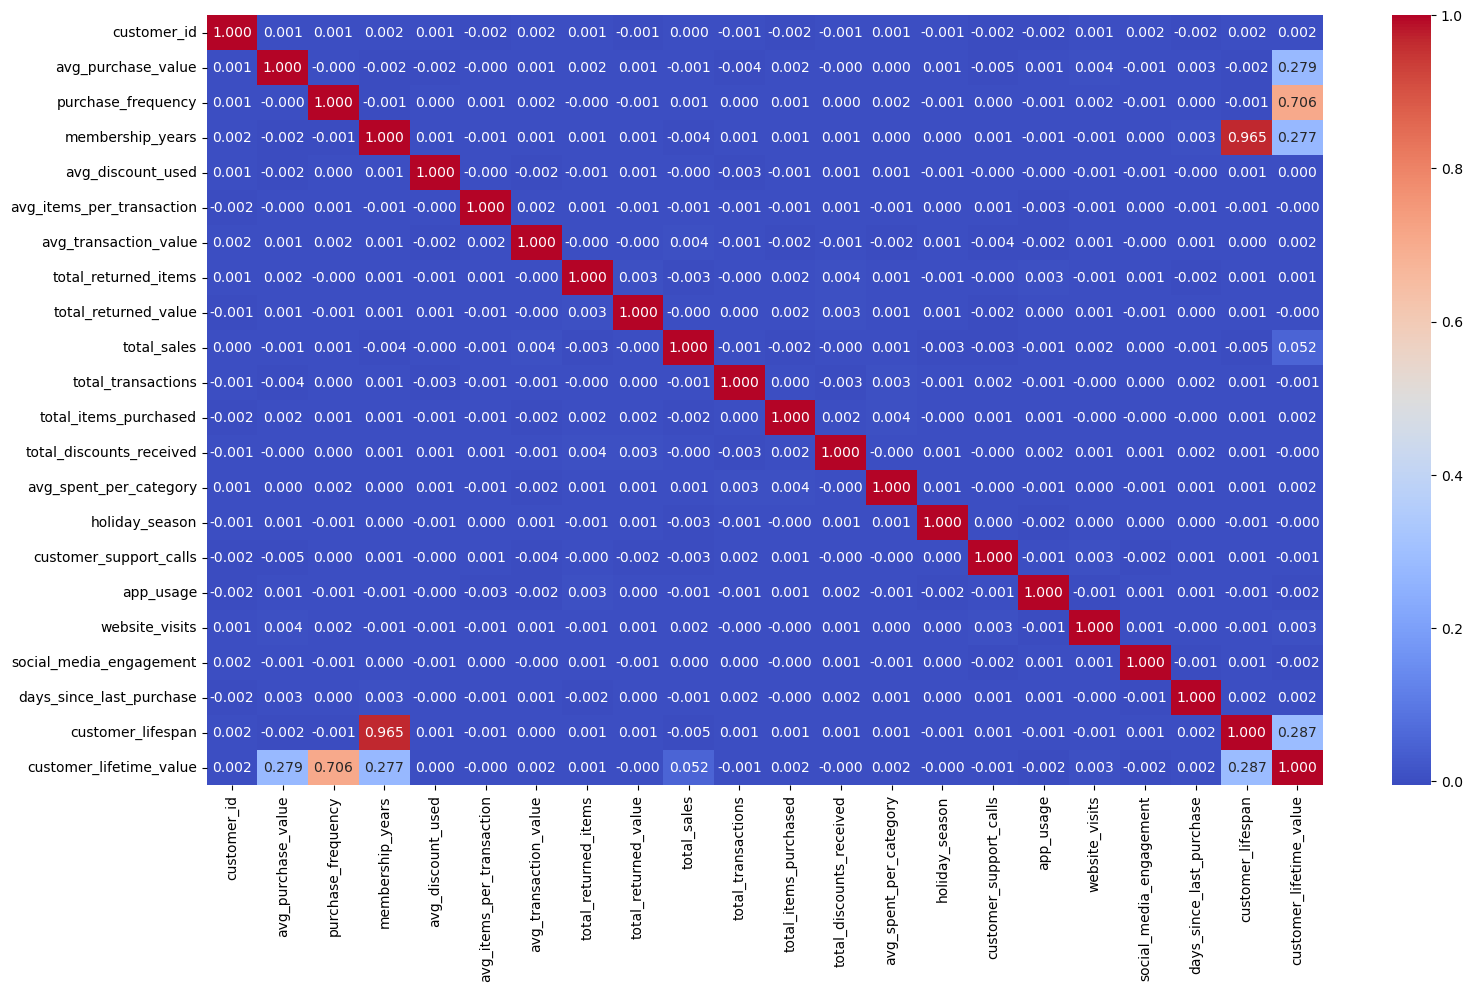

In [51]:
# correlation matrix to visualize relationships
plt.clf()
corr_matrix = lftv_data.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='coolwarm')
plt.show()

# Constructing Our X and Y data set. Preventing data leakage
    Drop customer_id ('not material for modeling'), customer_lifespan

    Issue: We had to calculate CLV as the ground truth, label Y for our model. It was calculated from average_purchase_value, purchase_frequency,customer_lifespan,total_sales
        To prevent the model from ‘cheating’, learning these parameters to calculate CLV (an issue known as data leakage), we first dropped these columns from our training set
        Our R2 went south, and our model performance was poor (very high validation and test RMSE). Model output:
            Fitting 5 folds for each of 10 candidates, totalling 50 fits
            Best hyperparameters from grid search:  {'n_estimators': np.int64(100), 'min_samples_split': 2, 'min_samples_leaf': 4, 
            'max_depth': 10, 'bootstrap': True}
            Validation RMSE:  92089.16723048303
            Test RMSE:  85989.74089547058
            Show each of above as % of mean Y label
            File: 207_LR_Model_1.ipynb
        To overcome this issue of model cheating (data leakage) *while still retaining a business logic intuition* (you can’t really calculate a CLV value w/o taking into account features for average purchase value, purchase frequency, total sales), this is what we did:
            Add gaussian noise to our CLV calculation (zero mean, percentage of original val for standard deviation)
            Similar noise for avg_purchase_value, purchase_frequency, membership_years, total_sales to make these features a bit ‘fuzzy’ for the model so that the model doesn’t cheat.
 

In [52]:
#add noise to 'avg_purchase_value', 'purchase_frequency', 'membership_years', 'total_sales'
add_noise_std_dev = 0.05
lftv_data['adjusted_avg_purch_val'] = \
        lftv_data['avg_purchase_value'].apply(lambda x: x + np.random.normal(0, add_noise_std_dev * x))
lftv_data['adjusted_purchase_frequency'] = \
        lftv_data['purchase_frequency'].apply(lambda x: x + np.random.normal(0, add_noise_std_dev * x))
lftv_data['adjusted_membership_years'] = \
        lftv_data['membership_years'].apply(lambda x: x + np.random.normal(0, add_noise_std_dev * x))
lftv_data['adjusted_total_sales'] = \
        lftv_data['total_sales'].apply(lambda x: x + np.random.normal(0, add_noise_std_dev * x))

In [53]:
summarize_dataframe(lftv_data)

,Column Name,Data Type,Null Count,Non-Null Count,Unique Count
0,customer_id,int64,0,500000,500000
1,avg_purchase_value,float64,0,500000,48999
2,purchase_frequency,int64,0,500000,4
3,membership_years,int64,0,500000,10
4,avg_discount_used,float64,0,500000,51
5,avg_items_per_transaction,float64,0,500000,901
6,avg_transaction_value,float64,0,500000,48998
7,total_returned_items,int64,0,500000,10
8,total_returned_value,float64,0,500000,99371
9,total_sales,float64,0,500000,392605


In [54]:
lftv_data.shape

(500000, 26)

In [55]:
lftv_data.head()

,customer_id,avg_purchase_value,purchase_frequency,membership_years,avg_discount_used,avg_items_per_transaction,avg_transaction_value,total_returned_items,total_returned_value,total_sales,...,app_usage,website_visits,social_media_engagement,days_since_last_purchase,customer_lifespan,customer_lifetime_value,adjusted_avg_purch_val,adjusted_purchase_frequency,adjusted_membership_years,adjusted_total_sales
987231,987232,460.29,52,8,0.49,1.70,374.84,5,170.41,4417.26,...,1,75,3,329,4.8,64871.900325,476.202055,54.101262,7.924930,4336.732887
79954,79955,471.25,12,1,0.36,5.96,127.35,0,970.63,3469.66,...,2,77,3,145,1.0,4706.337426,483.662751,11.974870,0.970713,3823.010726
567130,567131,200.59,52,0,0.24,3.22,190.46,8,219.24,6771.43,...,2,52,1,95,0.5,3900.144147,195.290685,51.897848,0.000000,6840.143298
500891,500892,416.72,52,3,0.43,3.24,304.81,5,723.65,9397.70,...,1,21,1,124,3.0,44182.619203,408.576282,51.245078,3.168003,9217.348975
55399,55400,180.79,365,3,0.48,9.76,136.49,6,32.39,5740.08,...,1,69,1,240,3.0,101449.206521,177.441534,350.832505,3.065191,6188.128697


# Towards X_dataset construction
    1. We will use ‘adjusted_avg_purch_val’, 'adjusted_purchase_frequency', 'adjusted_membership_years’, 'adjusted_total_sales' for model training

    2. We can drop columns = ['customer_id', 'avg_purchase_value', 'purchase_frequency', 'membership_years', 'total_sales', 'customer_lifespan'] from training


In [56]:
#construct our x_data
columns_to_drop = ['customer_id', 'avg_purchase_value', 'purchase_frequency', 'membership_years', 'total_sales', 'customer_lifespan']
x_dataset = lftv_data.drop(columns=columns_to_drop)
y_dataset = lftv_data['customer_lifetime_value'].values
x_dataset = x_dataset.drop(columns=['customer_lifetime_value']) # drop the Y label from the X data set

In [57]:
summarize_dataframe(x_dataset)

,Column Name,Data Type,Null Count,Non-Null Count,Unique Count
0,avg_discount_used,float64,0,500000,51
1,avg_items_per_transaction,float64,0,500000,901
2,avg_transaction_value,float64,0,500000,48998
3,total_returned_items,int64,0,500000,10
4,total_returned_value,float64,0,500000,99371
5,total_transactions,int64,0,500000,99
6,total_items_purchased,int64,0,500000,499
7,total_discounts_received,float64,0,500000,99326
8,avg_spent_per_category,float64,0,500000,98374
9,holiday_season,int64,0,500000,2


In [58]:
print(f"{ x_dataset.shape = }, { y_dataset.shape = }")
print(f"{ type(x_dataset) = }, { type(y_dataset) = }")

 x_dataset.shape = (500000, 19),  y_dataset.shape = (500000,)
 type(x_dataset) = <class 'pandas.core.frame.DataFrame'>,  type(y_dataset) = <class 'numpy.ndarray'>


# Workflow:
    1) Split the data into train and test
    2) Std scale (fit) on train data. Use mean and std dev of train data to std scale test data
        - This prevents data leakage from test to train. 

In [59]:
# Split + Std Scale
# Use a 60, 20, 20 split for train, validation and test

# Split into training + temp (Temp = validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(x_dataset, y_dataset, test_size=0.4, random_state=42)

# Now, split Temp into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("_"*150)
print("SHAPES OF SPLIT DATA SETS")
print("_"*150)
print(f"{ type(X_train) = }, { X_train.shape = }, { type(y_train) = } , { y_train.shape = }")
print(f"{ type(X_val) = }, { X_val.shape = }, { type(y_val) = } , { y_val.shape = }")
print(f"{ type(X_test) = }, { X_test.shape = }, { type(y_test) = } , { y_test.shape = }")
print("_"*150)
print("_"*150)

______________________________________________________________________________________________________________________________________________________
SHAPES OF SPLIT DATA SETS
______________________________________________________________________________________________________________________________________________________
 type(X_train) = <class 'pandas.core.frame.DataFrame'>,  X_train.shape = (300000, 19),  type(y_train) = <class 'numpy.ndarray'> ,  y_train.shape = (300000,)
 type(X_val) = <class 'pandas.core.frame.DataFrame'>,  X_val.shape = (100000, 19),  type(y_val) = <class 'numpy.ndarray'> ,  y_val.shape = (100000,)
 type(X_test) = <class 'pandas.core.frame.DataFrame'>,  X_test.shape = (100000, 19),  type(y_test) = <class 'numpy.ndarray'> ,  y_test.shape = (100000,)
______________________________________________________________________________________________________________________________________________________
______________________________________________________________

<Figure size 640x480 with 0 Axes>

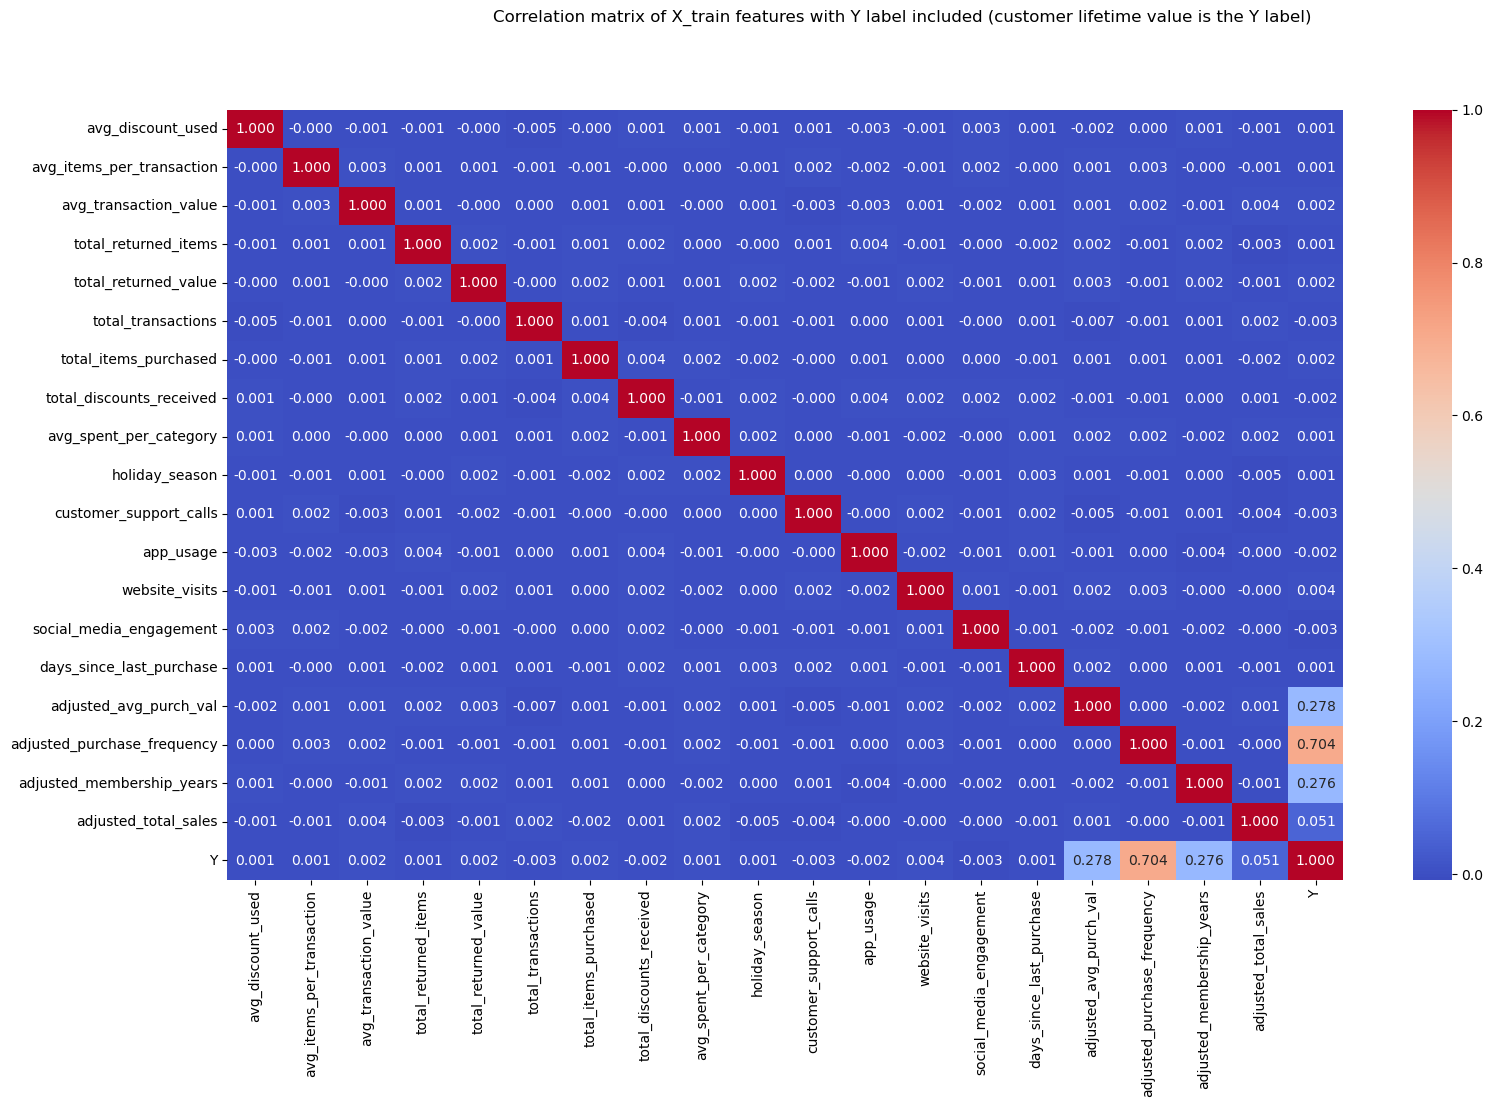

In [60]:
# correlation matrix to visualize relationships on our pruned data set for training
temp_df = X_train.copy()
temp_df['Y'] = y_train
plt.clf()
corr_matrix = temp_df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='coolwarm')
plt.suptitle("Correlation matrix of X_train features with Y label included (customer lifetime value is the Y label)")
plt.show()

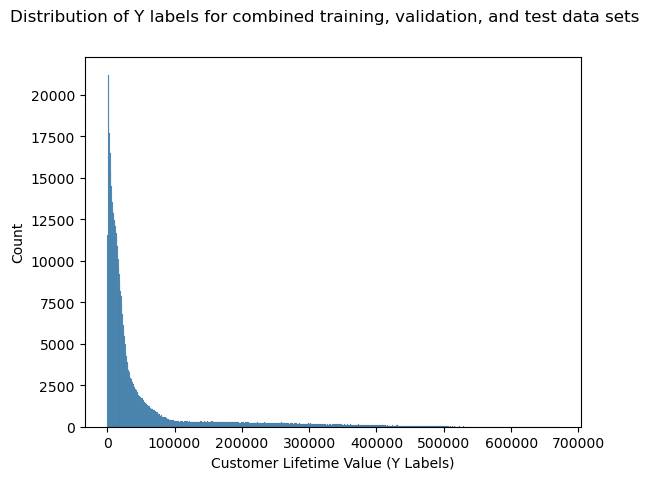

In [61]:
#Visualize distribiution of Y
plt.clf()
vstacked_y = np.concatenate((y_train,y_val,y_test)).flatten()
sns.histplot(vstacked_y)
plt.xlabel('Customer Lifetime Value (Y Labels)')
plt.ylabel('Count')
plt.suptitle('Distribution of Y labels for combined training, validation, and test data sets')

plt.show()

    # Our Y values have a wide range of values. So we will stad scale our Y labels as well for Linear Regression

# Scaling.
    1. Now we will standard scale x_train, x_val, and X_test data sets
    2. Since we are dealing with Linear Regression, we will std scale Y labels as well 

In [62]:
summarize_dataframe(X_train)

,Column Name,Data Type,Null Count,Non-Null Count,Unique Count
0,avg_discount_used,float64,0,300000,51
1,avg_items_per_transaction,float64,0,300000,901
2,avg_transaction_value,float64,0,300000,48901
3,total_returned_items,int64,0,300000,10
4,total_returned_value,float64,0,300000,95082
5,total_transactions,int64,0,300000,99
6,total_items_purchased,int64,0,300000,499
7,total_discounts_received,float64,0,300000,95052
8,avg_spent_per_category,float64,0,300000,94226
9,holiday_season,int64,0,300000,2


In [63]:
#Standard sclaing of X and Y

scaler_X = StandardScaler()
scaler_Y = StandardScaler()

scaler_X.fit(X_train)
scaler_Y.fit(y_train.reshape(-1,1)) #reshape 1D y to 2D for API acceptance

X_train_std = scaler_X.transform(X_train)
y_train_std = scaler_Y.transform(y_train.reshape(-1,1)).flatten() 

X_val_std = scaler_X.transform(X_val)
X_test_std = scaler_X.transform(X_test)

y_val_std = scaler_Y.transform(y_val.reshape(-1,1)).flatten() 
y_test_std = scaler_Y.transform(y_test.reshape(-1,1)).flatten() 

In [64]:
print("_"*150)
print("SHAPES OF SPLIT DATA SETS")
print("_"*150)
print(f"{ type(X_train_std) = }, { X_train_std.shape = }, { type(y_train_std) = } , { y_train_std.shape = }")
print(f"{ type(X_val_std) = }, { X_val_std.shape = }, { type(y_val_std) = } , { y_val_std.shape = }")
print(f"{ type(X_test_std) = }, { X_test_std.shape = }, { type(y_test_std) = } , { y_test_std.shape = }")
print("_"*150)
print("_"*150)

______________________________________________________________________________________________________________________________________________________
SHAPES OF SPLIT DATA SETS
______________________________________________________________________________________________________________________________________________________
 type(X_train_std) = <class 'numpy.ndarray'>,  X_train_std.shape = (300000, 19),  type(y_train_std) = <class 'numpy.ndarray'> ,  y_train_std.shape = (300000,)
 type(X_val_std) = <class 'numpy.ndarray'>,  X_val_std.shape = (100000, 19),  type(y_val_std) = <class 'numpy.ndarray'> ,  y_val_std.shape = (100000,)
 type(X_test_std) = <class 'numpy.ndarray'>,  X_test_std.shape = (100000, 19),  type(y_test_std) = <class 'numpy.ndarray'> ,  y_test_std.shape = (100000,)
______________________________________________________________________________________________________________________________________________________
________________________________________________________

# ________________________SECTION FOR MODEL RUN_______________

# Model 1: Multiple Linear Regression 

In [65]:
#Using multiple linear regression 
model = LinearRegression()


model.fit(X_train_std, y_train_std)

# Make predictions 
y_pred_train = model.predict(X_train_std)
y_pred_val = model.predict(X_val_std)
y_pred_test = model.predict(X_test_std)

# Evaluate the model
train_mse = mean_squared_error(y_train_std, y_pred_train)
val_mse = mean_squared_error(y_val_std, y_pred_val)
test_mse = mean_squared_error(y_test_std, y_pred_test)

train_r2 = r2_score(y_train_std, y_pred_train)
val_r2 = r2_score(y_val_std, y_pred_val)
test_r2 = r2_score(y_test_std, y_pred_test)

# Print the evaluation metrics
print("Train MSE:", train_mse)
print("Validation MSE:", val_mse)
print("Test MSE:", test_mse)

print("Train R²:", train_r2)
print("Validation R²:", val_r2)
print("Test R²:", test_r2)

Train MSE: 0.3473386543038703
Validation MSE: 0.34188236843116016
Test MSE: 0.3470929237130619
Train R²: 0.6526613456961299
Validation R²: 0.6531131137935452
Test R²: 0.6536754993046274


#  Model 2: 5-fold cross validation, with RandomForestRegressor to handle non linearity in data, using grid search


In [66]:
# Model 2: # 5 fold cross validation, with RandomForestRegressor to handle non linearity in data, using grid search

rf = RandomForestRegressor(random_state=42)

# hyperparameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],           
    'max_depth': [10, 20, None],                 
    'bootstrap': [True]                   
}

# Set up GridSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=5,  # Try 5 random combinations out of the 9
    cv=5,       # Keep 5-fold cross-validation
    n_jobs=-1,  # Use all CPU cores
    verbose=2,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Fit the model on the training data
random_search.fit(X_train_std, y_train_std)

#grid_search.fit(X_train_std, y_train_std)

print("Best hyperparameters from grid search: ", random_search.best_params_)

# Evaluate the best model on the validation set
best_rf = random_search.best_estimator_
y_val_pred_std = best_rf.predict(X_val_std)

# Inverse transform the std predictions and actual values for the validation set
# To calcuate RMSE on *ORIGINAL* Y Values
y_val_pred = scaler_Y.inverse_transform(y_val_pred_std.reshape(-1, 1))
y_val_original = scaler_Y.inverse_transform(y_val_std.reshape(-1, 1))

# Calculate RMSE for validation
rmse_val = np.sqrt(mean_squared_error(y_val_original, y_val_pred))
print("Validation RMSE: ", rmse_val)

# Evaluate on the test set using the best model
y_test_pred_std = best_rf.predict(X_test_std)

# Inverse transform test predictions
y_test_pred = scaler_Y.inverse_transform(y_test_pred_std.reshape(-1, 1))
y_test_original = scaler_Y.inverse_transform(y_test_std.reshape(-1, 1))

# Calculate RMSE for test
rmse_test = np.sqrt(mean_squared_error(y_test_original, y_test_pred))
print("Test RMSE: ", rmse_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END .....bootstrap=True, max_depth=10, n_estimators=200; total time= 6.6min
[CV] END .....bootstrap=True, max_depth=10, n_estimators=200; total time= 6.6min
[CV] END .....bootstrap=True, max_depth=10, n_estimators=200; total time= 6.6min
[CV] END ...bootstrap=True, max_depth=None, n_estimators=200; total time=11.5min
[CV] END ...bootstrap=True, max_depth=None, n_estimators=200; total time=11.5min
[CV] END ...bootstrap=True, max_depth=None, n_estimators=200; total time=11.5min
[CV] END ...bootstrap=True, max_depth=None, n_estimators=200; total time=11.5min
[CV] END ...bootstrap=True, max_depth=None, n_estimators=200; total time=11.5min
[CV] END .....bootstrap=True, max_depth=10, n_estimators=200; total time= 6.4min
[CV] END .....bootstrap=True, max_depth=10, n_estimators=200; total time= 6.4min
[CV] END .....bootstrap=True, max_depth=10, n_estimators=100; total time= 3.2min
[CV] END .....bootstrap=True, max_depth=10, n_est

In [67]:
#Lets calcuate test and validation RMSEs as percentage of their respective mean terrains

mean_val_Y, mean_test_Y = np.mean(y_val_original), np.mean(y_test_original) 
print(f"mean_val_Y = {mean_val_Y:.2f}, mean_test_Y = {mean_test_Y:.2f}")
print(f"Validation RMSE  = {(rmse_val/ mean_val_Y)*100:.2f}%,\n Test RMSE  = {(rmse_test/ mean_test_Y)*100:.2f}%")

mean_val_Y = 52909.82, mean_test_Y = 53446.34
Validation RMSE  = 23.16%,
 Test RMSE  = 22.98%


In [68]:
#Getting training RMSE and using an alternate route to calcuate RMSE using our best model


# Get the best model from the RandomizedSearchCV
best_model = random_search.best_estimator_

# Make predictions on the training, validation, and test data
y_train_pred = best_model.predict(X_train_std)
y_val_pred = best_model.predict(X_val_std)
y_test_pred = best_model.predict(X_test_std)

# Inverse transform the predictions to the original scale of the target variable
y_train_pred_original = scaler_Y.inverse_transform(y_train_pred.reshape(-1, 1))
y_val_pred_original = scaler_Y.inverse_transform(y_val_pred.reshape(-1, 1))
y_test_pred_original = scaler_Y.inverse_transform(y_test_pred.reshape(-1, 1))

# Inverse transform the actual target values (if necessary) to compare on the original scale
y_train_original = scaler_Y.inverse_transform(y_train_std.reshape(-1, 1))
y_val_original = scaler_Y.inverse_transform(y_val_std.reshape(-1, 1))
y_test_original = scaler_Y.inverse_transform(y_test_std.reshape(-1, 1))

# Calculate RMSE for training, validation, and test sets in the original scale
rmse_train = np.sqrt(mean_squared_error(y_train_original, y_train_pred_original))
rmse_val = np.sqrt(mean_squared_error(y_val_original, y_val_pred_original))
rmse_test = np.sqrt(mean_squared_error(y_test_original, y_test_pred_original))

# Print RMSE for each dataset
print(f"RMSE on Training Set (Original Scale): {rmse_train:.2f}")
print(f"RMSE on Validation Set (Original Scale): {rmse_val:.2f}")
print(f"RMSE on Test Set (Original Scale): {rmse_test:.2f}")


RMSE on Training Set (Original Scale): 5429.79
RMSE on Validation Set (Original Scale): 12251.45
RMSE on Test Set (Original Scale): 12282.84


In [69]:
mean_train_Y, mean_val_Y, mean_test_Y = np.mean(y_train_original), np.mean(y_val_original), np.mean(y_test_original) 
print(f"mean_train_Y = {mean_train_Y:.2f}, mean_val_Y = {mean_val_Y:.2f}, mean_test_Y = {mean_test_Y:.2f}")
print(f" Training RMSE  = {(rmse_train/ mean_train_Y)*100:.2f}%\n \
      Validation RMSE  = {(rmse_val/ mean_val_Y)*100:.2f}%,\n Test RMSE  = {(rmse_test/ mean_test_Y)*100:.2f}%")

mean_train_Y = 53154.07, mean_val_Y = 52909.82, mean_test_Y = 53446.34
 Training RMSE  = 10.22%
       Validation RMSE  = 23.16%,
 Test RMSE  = 22.98%


# Comments on our model performance
    - Our test RMSE is close to validation RMSE, and both are higher than training RMSE suggesting some overfitting and
    some loss of generalization

    Testing RMSE is ~ Validation RMSE suggesting some stability to unseen data. However, since both are higher than Training RMSE (by about 4%), this suggests some overfitting and some loss of generalization ability of our model.

    Understanding domain significance of our RMSE. Our test RMSE of 23.83% implies that on average on the test set our customer lifetime value predictions are off by 0.2383 x 53319.58 ~ 12.7K dollars.

    Customer lifetime value calculations are estimates, and are used to make directional decisions, and therefore do not have to be exactly accurate. Still, we can reduce both training, validation and test RMSE in our model by using a more expansive grid search and trying regularization.

    We can also try more advanced models like HistGradient boosting Regressor

In [70]:
#Save the model

import joblib

best_model = random_search.best_estimator_

# Save the best model to a file 
joblib.dump(best_model, 'clv1_best_rand_forest_regressor_model.pkl')

# Save the RandomizedSearchCV object which contains the best model, its parameters, and other metadata
joblib.dump(random_search, 'clv1_random_search_metadata.pkl')

# sSave only the best hyperparameters from the RandomizedSearchCV
best_params = random_search.best_params_
joblib.dump(best_params, 'clv1_best_rf_params.pkl')

print("CLV1 Model and metadata saved successfully.")


CLV1 Model and metadata saved successfully.


# Model 3: HistGradientBoostingRegressor

    We will now use another ensemble model that uses boosting. 
    Randomized grid search, regularization, and 5 fold cross validation

In [71]:
################################
#HIST GRADIENT BOOSTING REGRESSOR FOR SCI KIT
####################
from sklearn.ensemble import HistGradientBoostingRegressor


# Initialize the model
hgb_regressor = HistGradientBoostingRegressor(random_state=42)

# Hyperparameter grid for RandomizedSearchCV
param_grid = {
    'max_iter': [100, 200, 300],                # Number of boosting iterations (trees)
    'learning_rate': [0.001, 0.01, 0.1, 0.2],  # Learning rate for boosting
    'max_depth': [3, 5, 10, None],              # Maximum depth of trees (regularization)
    'min_samples_leaf': [10, 20, 50, 100],      # Minimum samples required to be at a leaf node (regularization)
    'l2_regularization': [0, 0.1, 0.5, 1.0],   # L2 regularization to prevent overfitting
    'early_stopping': [True],                   # Stop early if performance does not improve
}

# Set up RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=hgb_regressor,
    param_distributions=param_grid,
    n_iter=100,             # Number of random combinations to try
    cv=5,                  # 5-fold cross-validation
    n_jobs=-1,             # Use all CPU cores for faster execution
    verbose=1,             # Increase verbosity for progress tracking
    random_state=42,
    scoring='neg_mean_squared_error',  # Use MSE (Mean Squared Error) for scoring
)

# Fit the model on your training data
random_search.fit(X_train_std, y_train_std)

# Get the best model found by the search
best_model = random_search.best_estimator_

# Save the best model for later use
joblib.dump(best_model, 'best_hist_gradient_boosting_model.pkl')

# Print the best hyperparameters found
print("Best Hyperparameters:", random_search.best_params_)

# Optionally, you can check the best score (MSE)
print("Best Model Score:", random_search.best_score_)

# --- RMSE Calculation ---
# Function to calculate RMSE (on original scale using scaler_Y)
def calculate_rmse(y_true, y_pred, scaler_Y):
    # Inverse transform the true labels to the original scale
    y_true_original = scaler_Y.inverse_transform(y_true.reshape(-1, 1))

    # Inverse transform the predictions back to the original scale
    y_pred_original = scaler_Y.inverse_transform(y_pred.reshape(-1, 1))

    # Calculate the MSE (mean squared error) using the original scale
    mse = mean_squared_error(y_true_original, y_pred_original)
    rmse = np.sqrt(mse)
    return rmse

# Predict on training data (scaled)
y_train_pred_std = best_model.predict(X_train_std)
train_rmse = calculate_rmse(y_train_std, y_train_pred_std, scaler_Y)

# Predict on validation data (scaled)
y_val_pred_std = best_model.predict(X_val_std)
val_rmse = calculate_rmse(y_val_std, y_val_pred_std, scaler_Y)

# Predict on test data (scaled)
y_test_pred_std = best_model.predict(X_test_std)
test_rmse = calculate_rmse(y_test_std, y_test_pred_std, scaler_Y)

# Print RMSE for each dataset
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Validation RMSE: {val_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'min_samples_leaf': 50, 'max_iter': 200, 'max_depth': 5, 'learning_rate': 0.1, 'l2_regularization': 1.0, 'early_stopping': True}
Best Model Score: -0.022537718816461744
Training RMSE: 12782.86
Validation RMSE: 13059.30
Test RMSE: 13008.74


In [72]:
print("Hist Gradient Boosting Regressor Performance")
print(f"mean_train_Y = {mean_train_Y:.2f}, mean_val_Y = {mean_val_Y:.2f}, mean_test_Y = {mean_test_Y:.2f}")
print(f" Training RMSE  = {(train_rmse/ mean_train_Y)*100:.2f}%\n \
      Validation RMSE  = {(val_rmse/ mean_val_Y)*100:.2f}%\n Test RMSE  = {(test_rmse/ mean_test_Y)*100:.2f}%")

Hist Gradient Boosting Regressor Performance
mean_train_Y = 53154.07, mean_val_Y = 52909.82, mean_test_Y = 53446.34
 Training RMSE  = 24.05%
       Validation RMSE  = 24.68%
 Test RMSE  = 24.34%


# Model 2 versus Model 3 performance

    Model 2 Random Forest Regressor Performance:
        Training RMSE  = 20.04%
        Validation RMSE  = 23.51%,
        Test RMSE  = 23.83%

    Model 3 Hist Gradient Boosting Regressor Performance:
        Training RMSE  = 21.94%
        Validation RMSE  = 23.51%
        Test RMSE  = 24.04%

    *Model 3 performs worse than Model 2* We will now run a 4th model, and compare all model's performance later.
    4th model: A neural network regressor. 

# Model 4: Linear Regression Neural Network Model


In [73]:
#### Model: Neural Network

def build_model(input_dim):
    #Using keras functional API
    inputs = layers.Input(shape=(input_dim,))
    x = layers.Dense(64, activation='relu')(inputs)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(16, activation='relu')(x)
    
    # Output layer (for regression)
    outputs = layers.Dense(1, activation='linear')(x)
    
    # Define the model
    model = models.Model(inputs=inputs, outputs=outputs)
    
    # Compile the model
    #For linear regression loss = MSE, and metrics = Mean Absolute value of the error (MAE)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])
    
    return model

# FFNN RUN WAS MANUALLY ABORTED FOR 500K SAMPLES. BUT RANDOM FOREST AND HIST GRADIENT COMPLETED FOR 500 K

In [74]:
# Set up the model
input_dim = X_train_std.shape[1]  # Number of features in the training data
model = build_model(input_dim)

#set up callbacks for early stopping and model checkpoints
callbacks_list = [
    # Early stopping to prevent overfitting by monitoring validation loss
    EarlyStopping(
        monitor='val_loss',  # Monitor the validation loss
        patience=25,          # Stop after 25 epochs with no improvement. Very Delayed early stopping, to promote learning
        restore_best_weights=True  # Restore the best weights after training
    ),
    
    # Model checkpoint to save the model with the best validation loss
    ModelCheckpoint(
        filepath="clvm4_checkpoint_path.keras",  # File path to save the model
        monitor="val_loss",  # Monitor validation loss
        save_best_only=True, # Save only the model with the best validation loss
        save_weights_only=False,  # Save the entire model, not just the weights
        verbose=1  # Display progress when saving the model
    )
]

# Train the model
history = model.fit(X_train_std, y_train_std, epochs=100, batch_size=32, validation_data=(X_val_std, y_val_std), verbose=2,
                    callbacks=callbacks_list)


Epoch 1/100


2025-04-05 15:09:26.269847: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 15.45194, saving model to clvm4_checkpoint_path.keras
9375/9375 - 60s - 6ms/step - loss: 16.6388 - mae: 1.9011 - val_loss: 15.4519 - val_mae: 3.2481
Epoch 2/100

Epoch 2: val_loss did not improve from 15.45194
9375/9375 - 59s - 6ms/step - loss: 84.6958 - mae: 3.6967 - val_loss: 33.1975 - val_mae: 4.5525
Epoch 3/100

Epoch 3: val_loss did not improve from 15.45194
9375/9375 - 57s - 6ms/step - loss: 151.1784 - mae: 4.7254 - val_loss: 32.5818 - val_mae: 4.6567
Epoch 4/100

Epoch 4: val_loss did not improve from 15.45194
9375/9375 - 57s - 6ms/step - loss: 224.4013 - mae: 5.6577 - val_loss: 66.8103 - val_mae: 6.8024
Epoch 5/100

Epoch 5: val_loss improved from 15.45194 to 1.72515, saving model to clvm4_checkpoint_path.keras
9375/9375 - 59s - 6ms/step - loss: 380.4092 - mae: 6.8372 - val_loss: 1.7252 - val_mae: 0.9567
Epoch 6/100

Epoch 6: val_loss did not improve from 1.72515
9375/9375 - 58s - 6ms/step - loss: 428.0772 - mae: 7.4681 - val_loss: 4.0608

KeyboardInterrupt: 

In [ ]:
# Load the best model based on validation loss
best_model_NN = load_model("clvm4_checkpoint_path.keras")


In [ ]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

<Figure size 640x480 with 0 Axes>

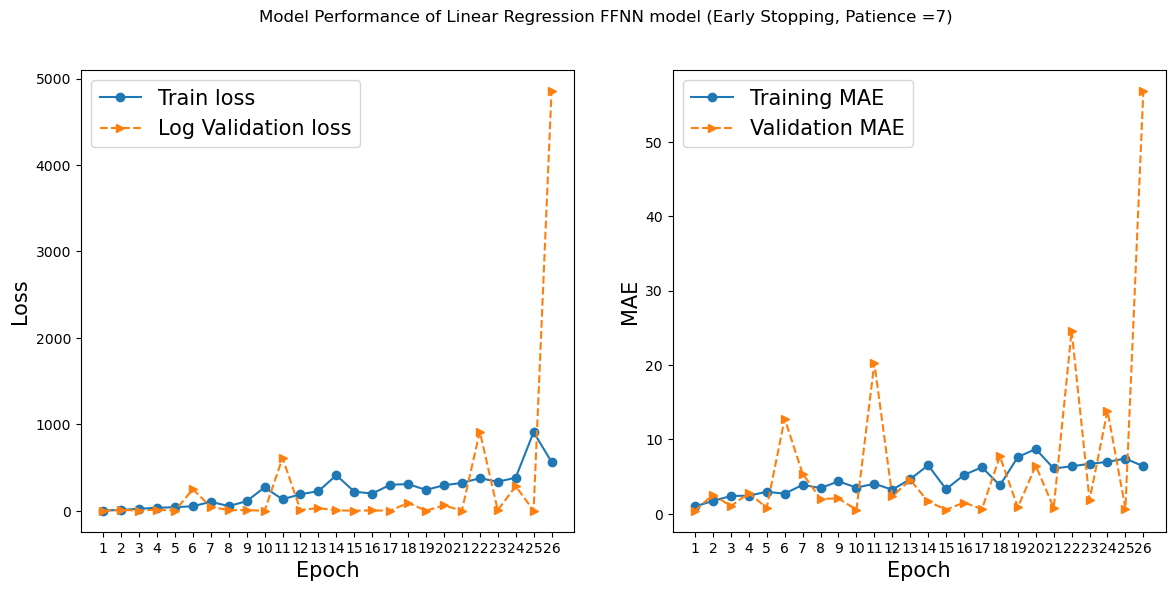

In [ ]:
#Visualization 
# plot loss curves
### YOUR CODE HERE ###

plt.clf()
hist = history.history
x_data = np.arange(len(hist['loss'])) + 1

fix, axes = plt.subplots(1,2, figsize=(14,6))
axes = axes.flatten()

###we print losses to prevent the extremely high first epoch training loss from impacting plot resolution
axes[0].plot(x_data, hist['loss'], '-o', label='Train loss')
axes[0].plot(x_data, hist['val_loss'], '-->', label='Log Validation loss')
axes[0].legend(fontsize=15)
axes[0].set_xlabel('Epoch', size=15)
axes[0].set_ylabel('Loss', size=15)
ticks = x_data
axes[0].set_xticks(ticks)
#axes[1].set_ylim(0,3) ## trying to prevent the high first epoch training loss from 

axes[1].plot(x_data, hist['mae'], '-o', label='Training MAE')
axes[1].plot(x_data, hist['val_mae'], '-->', label='Validation MAE')
axes[1].legend(fontsize=15)
axes[1].set_xlabel('Epoch', size=15)
axes[1].set_ylabel('MAE', size=15)
#axes[1].set_ylim(0,1)
ticks = x_data
axes[1].set_xticks(ticks)
plt.suptitle("Model Performance of Linear Regression FFNN model (Early Stopping, Patience =7)")
plt.show()

In [ ]:
##Calcuate RMSE from the best NN model

# Step 1: Make predictions on scaled data (train, validation, and test)
y_train_pred_std = best_model_NN.predict(X_train_std)
y_val_pred_std = best_model_NN.predict(X_val_std)
y_test_pred_std = best_model_NN.predict(X_test_std)

# Step 2: Inverse transform the predictions using scaler_Y
# To compare with original Ys
y_train_pred = scaler_Y.inverse_transform(y_train_pred_std)
y_val_pred = scaler_Y.inverse_transform(y_val_pred_std)
y_test_pred = scaler_Y.inverse_transform(y_test_pred_std)

# Step 3: A Function to calculate RMSE on original scale
def calculate_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse) #root to get us RMSE, we need this to do apples to apples comparison with other models
    return rmse

# Calculate RMSE for train, validation, and test sets
train_rmse = calculate_rmse(y_train, y_train_pred)
val_rmse = calculate_rmse(y_val, y_val_pred)
test_rmse = calculate_rmse(y_test, y_test_pred)

# Print the RMSE values
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Validation RMSE: {val_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step  
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step
Training RMSE: 59599.40
Validation RMSE: 60083.29
Test RMSE: 59776.90


In [ ]:
print("FFNN Linear Regresion Model (Model 4) Performance")
print(f"mean_train_Y = {mean_train_Y:.2f}, mean_val_Y = {mean_val_Y:.2f}, mean_test_Y = {mean_test_Y:.2f}")
print(f" Training RMSE  = {(train_rmse/ mean_train_Y)*100:.2f}%\n \
      Validation RMSE  = {(val_rmse/ mean_val_Y)*100:.2f}%\n Test RMSE  = {(test_rmse/ mean_test_Y)*100:.2f}%")

FFNN Linear Regresion Model (Model 4) Performance
mean_train_Y = 52809.40, mean_val_Y = 53066.03, mean_test_Y = 53319.58
 Training RMSE  = 112.86%
       Validation RMSE  = 113.22%
 Test RMSE  = 112.11%


# Model 4 (FFNN, Linear Regression) performance is worst so far
    Training RMSE, test, validation RMSEs are close, but training RMSE is very high. We need to add capacity to our model
    We will do this next, using hyper tuning

# Model 4B: FFNN with hyperparameter tuning

In [ ]:
MANUAL_BREAK_STOP_HERE

In [ ]:
def build_model(hp):
    model = models.Sequential()
    
    # Define the first hidden layer. Tunable number of neurons
    model.add(layers.Dense(
        units=hp.Int('units_1', min_value=32, max_value=256, step=32), 
        activation='relu', 
        input_shape=(X_train_std.shape[1],)
    ))
    
    # Define the second hidden layer. Tunable number of neurons
    model.add(layers.Dense(
        units=hp.Int('units_2', min_value=32, max_value=128, step=32), 
        activation='relu'
    ))

    # Output layer with a single neuron for regression
    model.add(layers.Dense(1, activation='linear'))
    
    # Tune the learning rate as well
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')),
        loss='mean_squared_error', 
        metrics=['mae']
    )
    
    return model

In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',  # Minimize validation loss
    max_trials=5,           # Number of random combinations to try
    executions_per_trial=1, # How many times to train the model with the same hyperparameters
    directory='kt_results',  # Directory to store results
    project_name='linear_regression_FFNN_tuning'
)


In [ ]:
tuner.search(X_train_std, y_train_std, epochs=10, batch_size=32, validation_data=(X_val_std, y_val_std))
best_model = tuner.get_best_models()[0]

Trial 5 Complete [00h 01m 50s]
val_loss: 0.3592357337474823

Best val_loss So Far: 0.3592357337474823
Total elapsed time: 00h 09m 06s


In [ ]:
callbacks_list = [
    # Early stopping to prevent overfitting by monitoring validation loss
    EarlyStopping(
        monitor='val_loss',  # Monitor the validation loss
        patience=5,          # Stop after 25 epochs with no improvement. Very Delayed early stopping, to promote learning
        restore_best_weights=True  # Restore the best weights after training
    ),
    
    # Model checkpoint to save the model with the best validation loss
    ModelCheckpoint(
        filepath="clvm4_checkpoint_path.keras",  # File path to save the model
        monitor="val_loss",  # Monitor validation loss
        save_best_only=True, # Save only the model with the best validation loss
        save_weights_only=False,  # Save the entire model, not just the weights
        verbose=1  # Display progress when saving the model
    )
]

In [ ]:
history = best_model.fit(X_train_std, y_train_std, epochs=100, batch_size=32, validation_data=(X_val_std, y_val_std), verbose=2,
                     callbacks=callbacks_list)


Epoch 1/100

Epoch 1: val_loss improved from inf to 0.36041, saving model to clvm4_checkpoint_path.keras
1875/1875 - 10s - 5ms/step - loss: 0.3516 - mae: 0.4015 - val_loss: 0.3604 - val_mae: 0.4150
Epoch 2/100

Epoch 2: val_loss did not improve from 0.36041
1875/1875 - 10s - 5ms/step - loss: 0.3519 - mae: 0.4014 - val_loss: 0.3615 - val_mae: 0.3988
Epoch 3/100

Epoch 3: val_loss improved from 0.36041 to 0.36014, saving model to clvm4_checkpoint_path.keras
1875/1875 - 10s - 5ms/step - loss: 0.3528 - mae: 0.4015 - val_loss: 0.3601 - val_mae: 0.4125
Epoch 4/100

Epoch 4: val_loss did not improve from 0.36014
1875/1875 - 10s - 5ms/step - loss: 0.3534 - mae: 0.4021 - val_loss: 0.3606 - val_mae: 0.4037
Epoch 5/100

Epoch 5: val_loss did not improve from 0.36014
1875/1875 - 10s - 5ms/step - loss: 0.3537 - mae: 0.4021 - val_loss: 0.3639 - val_mae: 0.4244
Epoch 6/100

Epoch 6: val_loss did not improve from 0.36014
1875/1875 - 10s - 5ms/step - loss: 0.3546 - mae: 0.4023 - val_loss: 0.3644 - val_

<Figure size 640x480 with 0 Axes>

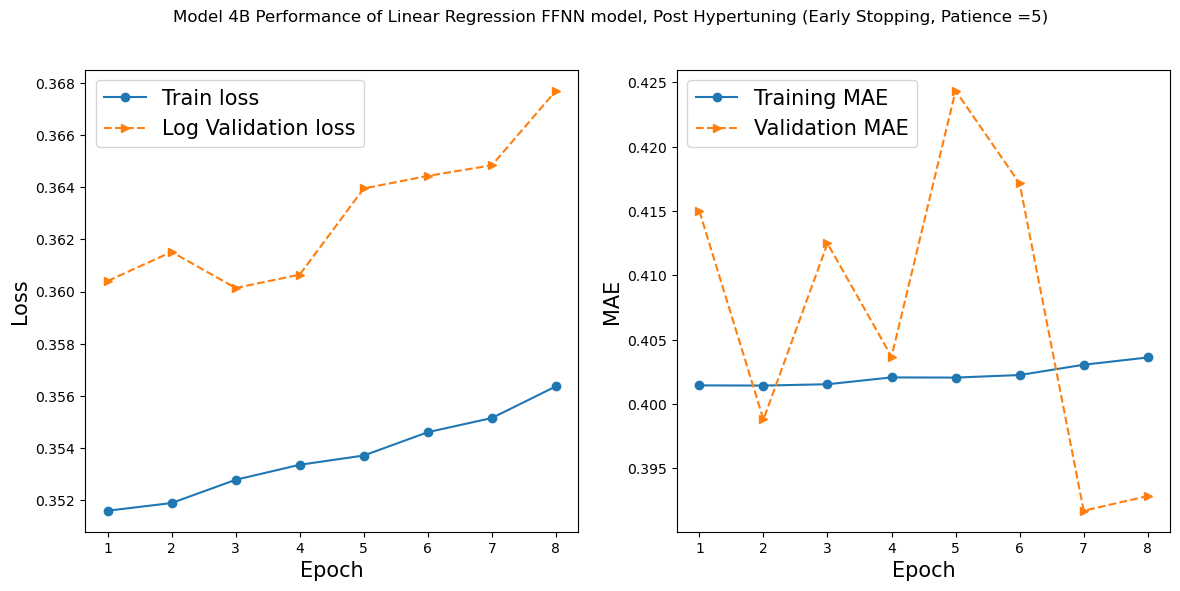

In [ ]:
#Visualization 
# plot loss curves
### YOUR CODE HERE ###

plt.clf()
hist = history.history
x_data = np.arange(len(hist['loss'])) + 1

fix, axes = plt.subplots(1,2, figsize=(14,6))
axes = axes.flatten()

###we print losses to prevent the extremely high first epoch training loss from impacting plot resolution
axes[0].plot(x_data, hist['loss'], '-o', label='Train loss')
axes[0].plot(x_data, hist['val_loss'], '-->', label='Log Validation loss')
axes[0].legend(fontsize=15)
axes[0].set_xlabel('Epoch', size=15)
axes[0].set_ylabel('Loss', size=15)
ticks = x_data
axes[0].set_xticks(ticks)
#axes[1].set_ylim(0,3) ## trying to prevent the high first epoch training loss from 

axes[1].plot(x_data, hist['mae'], '-o', label='Training MAE')
axes[1].plot(x_data, hist['val_mae'], '-->', label='Validation MAE')
axes[1].legend(fontsize=15)
axes[1].set_xlabel('Epoch', size=15)
axes[1].set_ylabel('MAE', size=15)
#axes[1].set_ylim(0,1)
ticks = x_data
axes[1].set_xticks(ticks)
plt.suptitle("Model 4B Performance of Linear Regression FFNN model, Post Hypertuning (Early Stopping, Patience =5)")
plt.show()

In [ ]:
##Calcuate RMSE from the best model from hypertuning

# Step 1: Make predictions on scaled data (train, validation, and test)
y_train_pred_std = best_model.predict(X_train_std)
y_val_pred_std = best_model.predict(X_val_std)
y_test_pred_std = best_model.predict(X_test_std)

# Step 2: Inverse transform the predictions using scaler_Y
# To compare with original Ys
y_train_pred = scaler_Y.inverse_transform(y_train_pred_std)
y_val_pred = scaler_Y.inverse_transform(y_val_pred_std)
y_test_pred = scaler_Y.inverse_transform(y_test_pred_std)

# Step 3: A Function to calculate RMSE on original scale
def calculate_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse) #root to get us RMSE, we need this to do apples to apples comparison with other models
    return rmse

# Calculate RMSE for train, validation, and test sets
train_rmse = calculate_rmse(y_train, y_train_pred)
val_rmse = calculate_rmse(y_val, y_val_pred)
test_rmse = calculate_rmse(y_test, y_test_pred)

# Print the RMSE values
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Validation RMSE: {val_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 930us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 886us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 950us/step
Training RMSE: 52320.36
Validation RMSE: 53045.76
Test RMSE: 52363.99


In [ ]:
print("FFNN Linear Regresion Model post Hypertuning (Model 4B) Performance")
print(f"mean_train_Y = {mean_train_Y:.2f}, mean_val_Y = {mean_val_Y:.2f}, mean_test_Y = {mean_test_Y:.2f}")
print(f" Training RMSE  = {(train_rmse/ mean_train_Y)*100:.2f}%\n \
      Validation RMSE  = {(val_rmse/ mean_val_Y)*100:.2f}%\n Test RMSE  = {(test_rmse/ mean_test_Y)*100:.2f}%")

FFNN Linear Regresion Model post Hypertuning (Model 4B) Performance
mean_train_Y = 52809.40, mean_val_Y = 53066.03, mean_test_Y = 53319.58
 Training RMSE  = 99.07%
       Validation RMSE  = 99.96%
 Test RMSE  = 98.21%


# A baseline model and its prediction on test data

    Calculate the mean of the target variable Y_train

    Calculate RMSE on the Test Set: With the mean of Y_train as a constant prediction, we compute the Root Mean Square Error (RMSE) using the true Y_test values and these constant baseline predictions.


In [ ]:
y_test.shape

(20000,)

In [ ]:
baseline_mean = np.mean(Y_train)
baseline_predictions = np.full_like(Y_test, baseline_mean)
rmse_baseline = np.sqrt(mean_squared_error(Y_test, baseline_predictions))
print(f"Baseline RMSE: {rmse_baseline}")

In [ ]:
mean_train_Y = np.mean(y_train)
print(f"Mean Y Train (mean CLV for train data) is { round(mean_train_Y,0)}")
Y_test_pred_baseline = np.full(y_test.shape, mean_train_Y)
baseline_rmse = np.sqrt(mean_squared_error(y_test, Y_test_pred_baseline))
print(f"Baseline RMSE (using mean of Y_rain as prediction): {baseline_rmse:.2f}")
baseline_rmse_percent  = round((baseline_rmse/ mean_train_Y)*100,2)
print(f"Baseline Test RMSE is: { baseline_rmse_percent}%")


Mean Y Train (mean CLV for train data) is 52809.0
Baseline RMSE (using mean of Y_rain as prediction): 88508.90
Baseline Test RMSE is: 167.6%


# Model Comparison
        Baseline Test RMSE: 167.6%

        Model 2 Random Forest Regressor Performance:
                Training RMSE  = 20.04%
                Validation RMSE  = 23.51%,
                Test RMSE  = 23.83%

        Model 3 Hist Gradient Boosting Regressor Performance:
                Training RMSE  = 21.94%
                Validation RMSE  = 23.51%
                Test RMSE  = 24.04%

         Model 4: FFNN Linear Regresion Model (Model 4) Performance
                mean_train_Y = 52809.40, mean_val_Y = 53066.03, mean_test_Y = 53319.58
                Training RMSE  = 112.86%
                Validation RMSE  = 113.22%
                Test RMSE  = 112.11%
    
        Model 4B: FFNN Linear Regresion Model post Hypertuning (Model 4B) Performance
                mean_train_Y = 52809.40, mean_val_Y = 53066.03, mean_test_Y = 53319.58
                Training RMSE  = 99.07%
                Validation RMSE  = 99.96%
                Test RMSE  = 98.21%

# Commentary / Analysis 
    All our models beat the baseline model. Fine tuned FFNN (Model 4B) performs better than its non fine tuned counter part (Model 4), using test RMSE as the baronmeter metric.
    History Gradient Boosting Regressor performance is close to Random Forest Regressor Performance.

    Random Forest Regressor has the best performance using low training RMSE, small gap b/w val RMSE and training RMSE, small gap b/w test and training RMSE, and small gap b/w val and test RMSE (more stability to unseen data), and low overall test RMSE as the criteria.

    Model 2: Random Forest Regressor is our final model for predicting customer lifetime value

In [ ]:
#Save the best_rf model (Model 2) for later use
best_rf

RandomForestRegressor(max_depth=10, random_state=42)

In [ ]:

rf_params = best_rf.get_params()
print("Best model parameters of best_rf, Model 2:")
for param, value in rf_params.items():
    print(f"{param}: {value}")

# Save the entire best model for later reuse
joblib.dump(best_rf, 'best_rf_model_2_CLV.pkl')

# Save the parameters separately (if needed)
joblib.dump(rf_params, 'best_rf_model_2_CLV_parameters.pkl')

print("Best model and parameters have been saved for Model 2 (Random Forest Regressor)")


Best model parameters of best_rf, Model 2:
bootstrap: True
ccp_alpha: 0.0
criterion: squared_error
max_depth: 10
max_features: 1.0
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False
Best model and parameters have been saved for Model 2 (Random Forest Regressor)
